**Inteligência Artificial**

**812839 - Vinícius Miranda de Araújo**

**Lista de Exercícios 07**

---
---

## **Questão 1**

---


### **1. Pré-processamento da base de dados**

In [103]:
!pip install plotly --upgrade
!pip install kneed # To install only knee-detection algorithm

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.stats import zscore
from sklearn.cluster import KMeans #Importando a função Kmeans
from sklearn.metrics import silhouette_score
from kneed import DataGenerator, KneeLocator #para mostrar o número de grupos ideal do agrupamento
from sklearn.preprocessing import MinMaxScaler #Função utilizada para normalização dos dados
from sklearn.preprocessing import StandardScaler #Função utilizada para normalização dos dados

**Lendo `.csv`:**

In [105]:
df = pd.read_csv("Iris.csv", sep=',', encoding='utf-8')

In [106]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### **Verificando Dados Ausentes**

In [107]:
missing_indexs = df[df.isnull().any(axis=1)].index
if len(missing_indexs) > 0:
  print('Dados Ausentes:')
  display(df.iloc[missing_indexs])
else:
  print('Não há dados ausentes')

Não há dados ausentes


#### **Verificando Dados Redundantes**

In [108]:
column_names = df.columns[:-1]
df_duplicates = df[df.duplicated(subset=column_names,keep=False)]
if len(df_duplicates) > 0:
  print('Dados Redundantes:')
  display(df_duplicates)
else:
  print('Não há dados redundantes')

Dados Redundantes:


,sepallength,sepalwidth,petallength,petalwidth,class
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


**Removendo Dados Redundantes**

In [109]:
def delDuplicatas( df_dataset ):
  df_dataset = df_dataset.drop_duplicates(keep = 'first')
  return df_dataset
# delDuplicatas

df = delDuplicatas( df )

#### **Verificando Dados Inconsistentes**

In [110]:
df_duplicates = df[df.duplicated(subset=column_names,keep=False)]
if len(df_duplicates)>0:
  print('Dados Inconsistentes:')
  display(df_duplicates)
else:
  print('Não há dados inconsistentes')

Não há dados inconsistentes


**Removendo Dados Inconsistentes**

In [111]:
def delInconsistencias(df_dataset):
  df_dataset = df_dataset.drop_duplicates(subset=column_names,keep=False)
  return df_dataset
# delInconsistencias

df = delInconsistencias(df)
df_duplicates = df[df.duplicated(subset=column_names,keep=False)]
if len(df_duplicates)>0:
  display(df_duplicates)
else:
  print('Não há dados redundantes ou inconsistentes')

Não há dados redundantes ou inconsistentes


#### **Detectando Outliers**

Boxplot:

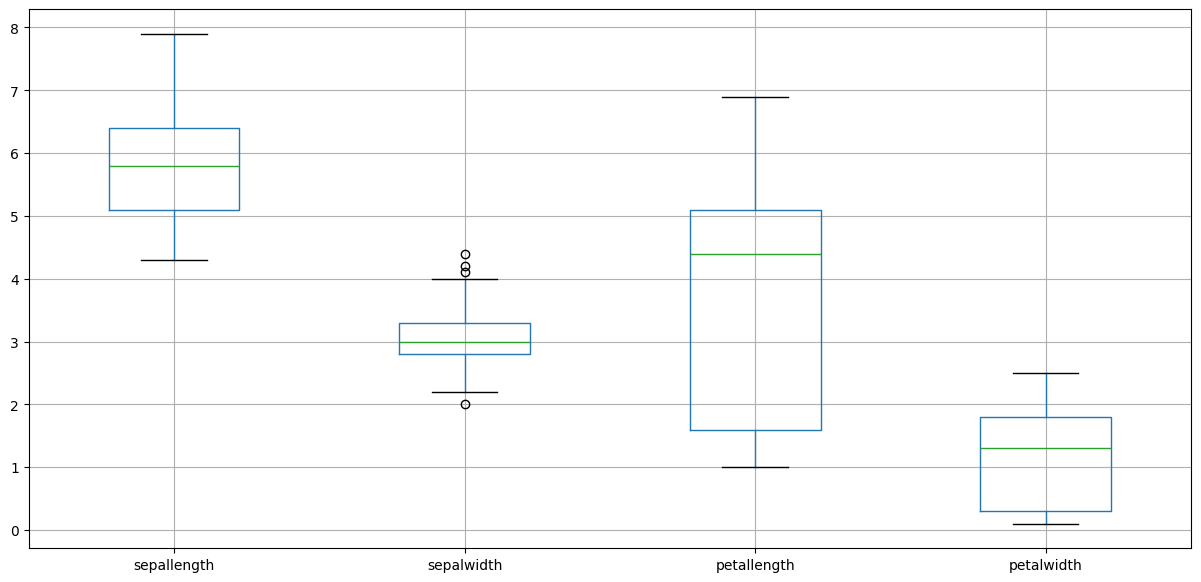

In [112]:
df.boxplot(figsize=(15,7))
plt.show()

Scatter

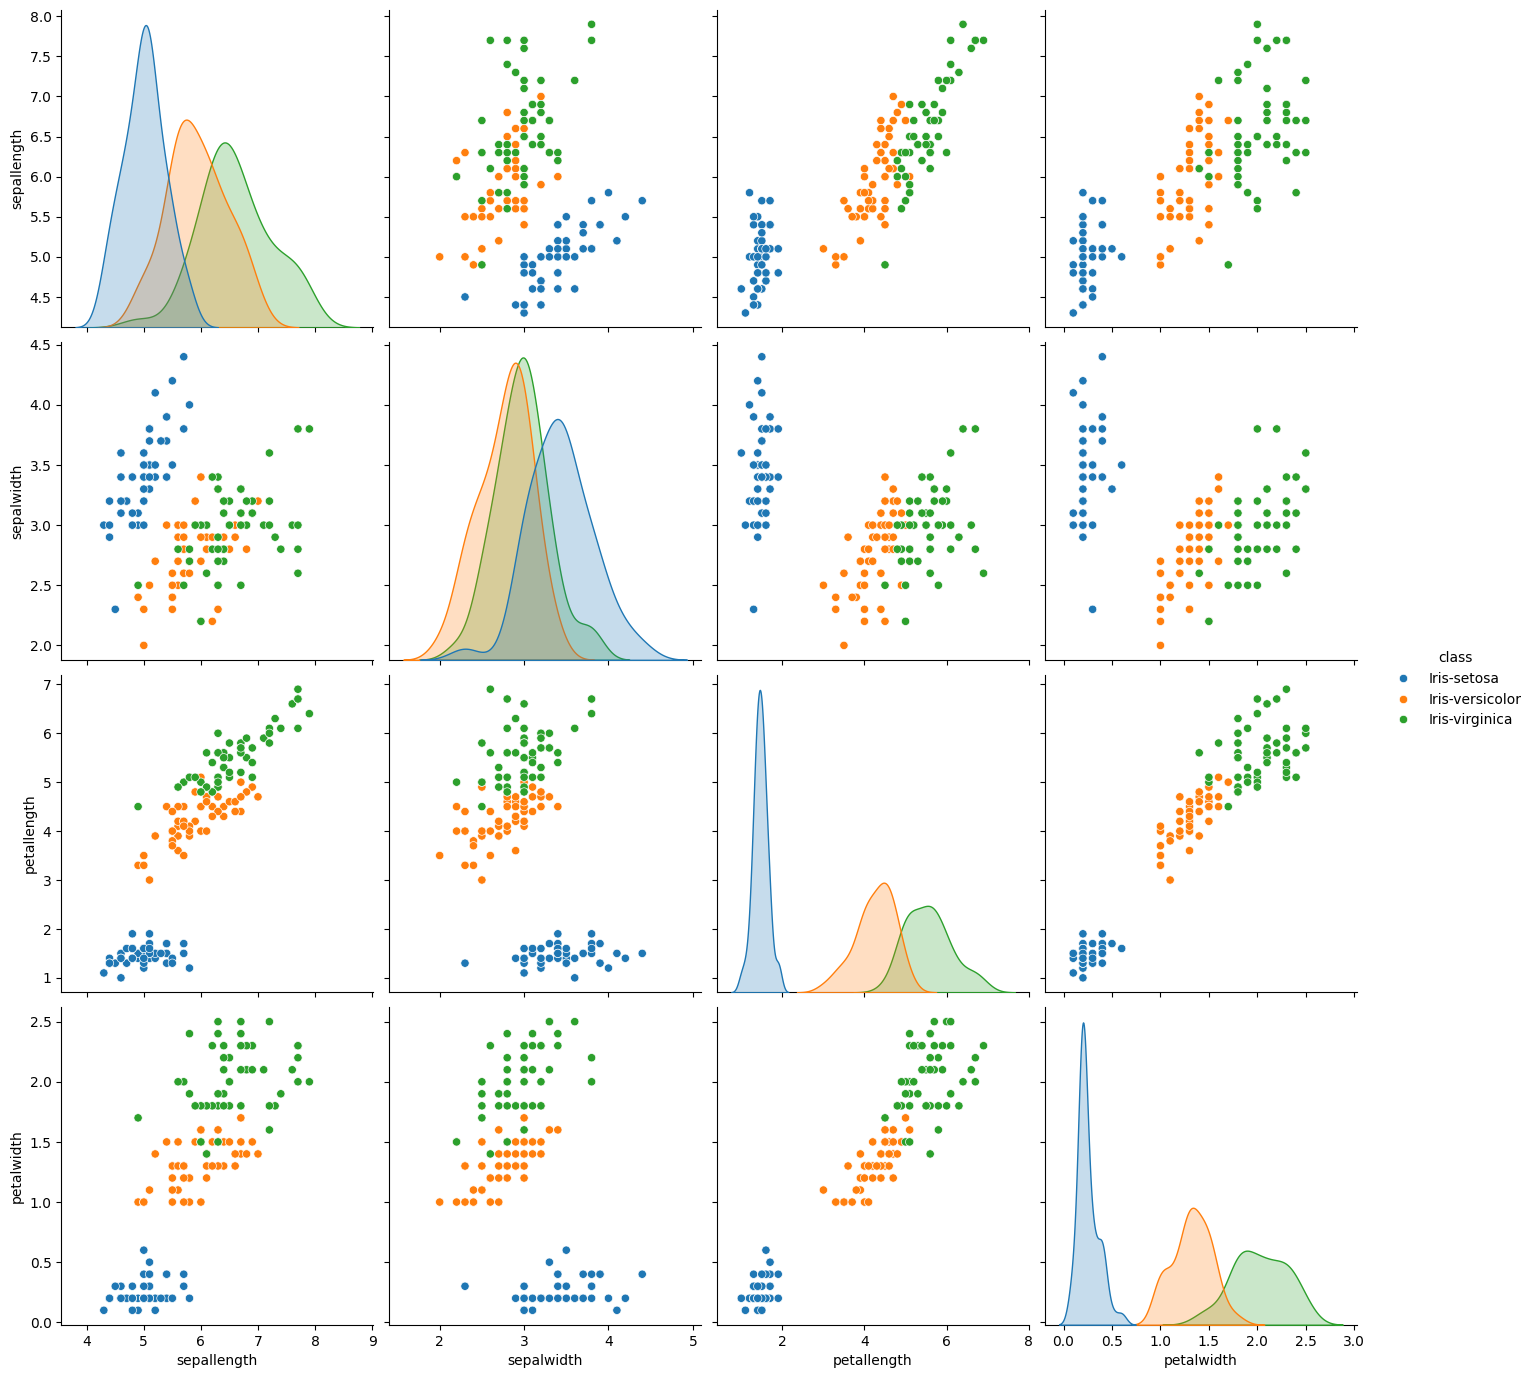

In [113]:
sns.pairplot(df, hue='class', height=3.5);
plt.show()

**Removendo Outliers**

In [114]:
z_scores = zscore(df[list(column_names)])
z_df = pd.DataFrame(z_scores, columns=list(column_names))
outlier_mask = (np.abs(z_df) > 3).any(axis=1)
outliers = df[outlier_mask]

# Visualiza
print(f"{len(outliers)} instância(s) detectada(s) como outlier(s) (z-score > 3):")
display(outliers)

# Remove
df = df[~outlier_mask].reset_index(drop=True)

1 instância(s) detectada(s) como outlier(s) (z-score > 3):


,sepallength,sepalwidth,petallength,petalwidth,class
15,5.7,4.4,1.5,0.4,Iris-setosa


### **2. Encontrando agrupamentos utilizando Silhouette e Elbow**


#### **Normalização dos Dados**

In [115]:
Entrada = df.iloc[:, 0:4].values
scaler = MinMaxScaler()
Entrada = scaler.fit_transform(Entrada)

#### **Avaliando Silhouette Score**


In [116]:
limit = int((Entrada.shape[0] // 2) ** 0.5)
sil_scores = []
k_range = range(2, limit+1)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(Entrada)
    score = silhouette_score(Entrada, labels)
    sil_scores.append(score)
    print(f"Silhouette Score k = {k}: {score:.3f}")

Silhouette Score k = 2: 0.623
Silhouette Score k = 3: 0.480
Silhouette Score k = 4: 0.436
Silhouette Score k = 5: 0.404
Silhouette Score k = 6: 0.310
Silhouette Score k = 7: 0.328
Silhouette Score k = 8: 0.304


**Gráfico Silhouette:**

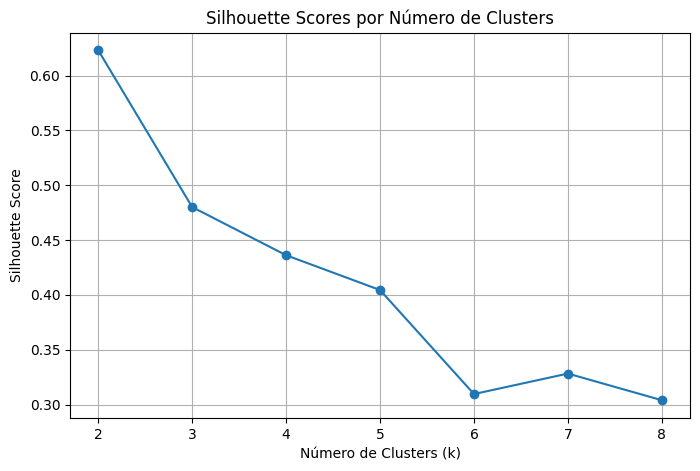

In [117]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Scores por Número de Clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

#### **Avaliando o Elbow Method**

In [118]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(Entrada)
    wcss.append(kmeans.inertia_)

**Gráfico Elbow**

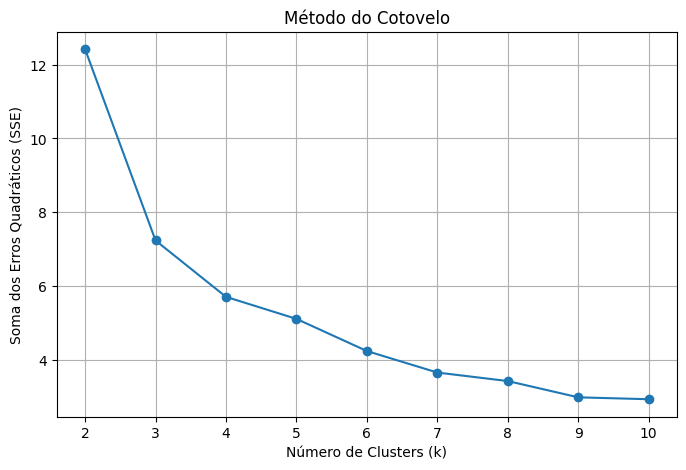

In [119]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Soma dos Erros Quadráticos (SSE)")
plt.grid(True)
plt.show()

**Localiza o cotovelo**

In [120]:
kl = KneeLocator(range(2, 11), wcss, curve="convex", direction="decreasing")
k_otimo = int(kl.elbow)
print(f"Valor ótimo de k encontrado pelo método do cotovelo: {k_otimo}")

Valor ótimo de k encontrado pelo método do cotovelo: 4


#### **Kmeans**

In [121]:
kmeans = KMeans(n_clusters=3, random_state=0)
saida_kmeans = kmeans.fit_predict(Entrada)

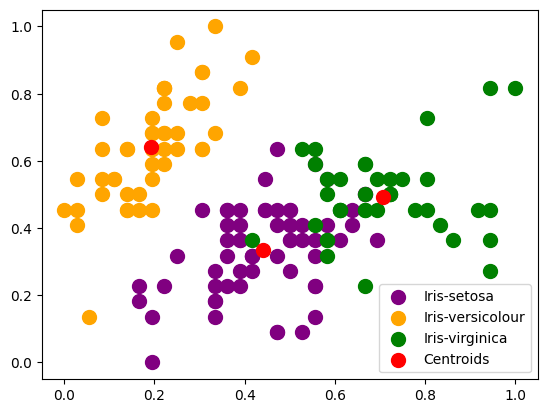

In [122]:
plt.scatter(Entrada[saida_kmeans == 0, 0], Entrada[saida_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(Entrada[saida_kmeans == 1, 0], Entrada[saida_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(Entrada[saida_kmeans == 2, 0], Entrada[saida_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

#### **Conclusão**

Os resultados do Silhouette Score indicaram que o **agrupamento com 2 clusters teve a melhor separação** entre grupos, com um score de 0.623. Os valores com mais clusters apresentaram scores fracos ou não substanciais, indicando que 2 clusters é o melhor possível nesse caso.

Além disso, o método do cotovelo sugeriu que o valor ideal de clusters é **k = 4**, ponto em que a redução da soma dos erros quadráticos (SSE) deixa de ser significativa.

Dessa maneira, para equilibrar uma boa separação, coesão e menor overfitting, 3 ou 4 clusteres seriam o ideal.

### **3. Investigando os hiperparâmetros do K-means**


#### 1. **`init`: Método de inicialização dos centróides**

Este parâmetro controla **como os centróides iniciais** são escolhidos, o que pode influenciar fortemente os resultados.

- `'k-means++'` (default):  
  Inicializa os centróides de forma inteligente, espalhando-os para melhorar a convergência e evitar más soluções locais.  
  
  - Recomendado na maioria dos casos.

- `'random'`:  
  Escolhe centróides iniciais aleatoriamente, o que pode levar a soluções ruins, especialmente em bases grandes ou mal distribuídas.  
  
  - Pode causar variações nos resultados entre execuções.

---

#### 2. **`n_init`: Número de inicializações**

Define **quantas vezes o algoritmo será rodado com diferentes centróides iniciais**. O melhor resultado (com menor inércia) é mantido.

- Valor padrão até 2023 era `10`; atualmente pode ser `'auto'` (inteligente).
- Um valor mais alto reduz o risco de cair num **mínimo local ruim**, mas aumenta o tempo de processamento.

---

#### 3. **Distância usada (KMeans sempre usa Euclidiana)**

O **KMeans tradicional** usa **somente a distância Euclidiana** para calcular a proximidade dos pontos aos centróides, por definição.

##### **Outras distâncias**:
- Distância **manhattan (L1)**, **coseno**, etc., exigem variantes como:
  - `KMedoids` (do pacote `scikit-learn-extra`)
  - `DBSCAN` (suporta diversas distâncias)
  - `AgglomerativeClustering` (em clustering hierárquico)

---

#### 4. **`max_iter`: Número máximo de iterações**

Número de iterações para o algoritmo convergir:

- Valor padrão: `300`
- Se os dados forem complexos ou muitos clusters, aumentar isso evita parar cedo.

---

#### 5. **`tol`: Tolerância para convergência**

Define o quanto os centróides podem mudar antes de o algoritmo considerar que "convergiu".

- Um valor muito pequeno pode levar a mais iterações, sem ganho significativo.



### **4. Explicação das Métricas: Silhouette Score e SSE**


#### **1. SSE (Sum of Squared Errors / Soma dos Erros Quadráticos)**

É a métrica usada no **Elbow Method**.

##### **Definição**:

Para cada ponto no cluster, calcula a **distância ao centróide do cluster** e **eleva ao quadrado**. A soma total de todos os clusters define o erro total.

##### **Fórmula**:

$$
\text{SSE} = \sum_{i=1}^{k} \sum_{x \in C_i} \|x - \mu_i\|^2
$$

- $k$: número de clusters  
- $C_i$: conjunto de pontos no cluster $i$  
- $\mu_i$: centróide do cluster $i$  
- $x$: ponto no cluster  
- $\|x - \mu_i\|^2$: distância euclidiana ao quadrado do ponto ao centróide

##### **Interpretação**:

Quanto menor o SSE, mais coesos são os clusters. Porém, à medida que $k$ aumenta, o SSE sempre diminui — daí a utilidade do **"cotovelo"** para escolher um bom trade-off.


#### **2. Silhouette Score**

É uma métrica de **coerência interna e separação entre clusters**. Mede o quão bem cada ponto está inserido no seu cluster comparado aos demais.

##### **Fórmula**:

$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
$$

- $a(i)$: distância média entre o ponto $i$ e todos os outros pontos no **mesmo cluster**  
- $b(i)$: menor distância média do ponto $i$ a **outros clusters** (i.e., cluster mais próximo)  
- $s(i)$ varia entre -1 e 1:
  - Perto de **1**: ponto bem agrupado  
  - Perto de **0**: ponto entre clusters  
  - Negativo: ponto agrupado no cluster errado

### **5. Métrica de avaliação diferente das 2 anteriores**


#### **Davies-Bouldin Index (DBI)**

##### **Definição**:

O **DBI** mede a **semelhança entre clusters**, comparando **distância entre centróides** e **dispersão dentro de cada cluster**.

##### **Fórmula**:

$$
\text{DBI} = \frac{1}{k} \sum_{i=1}^{k} \max_{j \ne i} \left( \frac{s_i + s_j}{d_{ij}} \right)
$$

- $k$: número de clusters  
- $s_i$: dispersão média do cluster $i$ (distância média dos pontos ao centróide)  
- $d_{ij}$: distância entre os centróides dos clusters $i$ e $j$  
- A fórmula busca o **pior caso (máximo)** de similaridade de $i$ com qualquer outro cluster $j$

##### **Interpretação**:

- **Quanto menor**, **melhor** o agrupamento.
- Valores próximos de **0** indicam clusters bem separados e compactos.

In [123]:
from sklearn.metrics import davies_bouldin_score

for k in range(2, 12):
    model = KMeans(n_clusters=k, random_state=42)
    labels = model.fit_predict(Entrada)
    dbi = davies_bouldin_score(Entrada, labels)
    print(f"Davies-Bouldin Index k={k}: {dbi:.3f}")

Davies-Bouldin Index k=2: 0.495
Davies-Bouldin Index k=3: 0.786
Davies-Bouldin Index k=4: 0.888
Davies-Bouldin Index k=5: 0.973
Davies-Bouldin Index k=6: 1.011
Davies-Bouldin Index k=7: 1.087
Davies-Bouldin Index k=8: 1.110
Davies-Bouldin Index k=9: 1.012
Davies-Bouldin Index k=10: 1.019
Davies-Bouldin Index k=11: 1.009


### **6. Aplicar DBSCAN e SOM e comparar com KMeans**

#### **DBSCAN**

Agrupamento baseado em densidade. Identifica regiões densas de pontos e marca como outliers os pontos isolados.

In [124]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(Entrada)
# Número de clusters encontrados (desconsiderando rótulo -1, que é ruído)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"Número de clusters encontrados pelo DBSCAN: {n_clusters_dbscan}")

Número de clusters encontrados pelo DBSCAN: 2


#### **SOM (Self-Organizing Maps)**

Rede neural não supervisionada que projeta os dados em um mapa 2D e organiza por similaridade.


In [125]:
!pip install minisom

In [126]:
from minisom import MiniSom

som = MiniSom(x=2, y=2, input_len=Entrada.shape[1], sigma=0.5, learning_rate=0.5)
som.train_random(Entrada, 100)
som_labels = np.array([som.winner(x) for x in Entrada])
unique_som_labels = np.unique(som_labels, axis=0)
som_n_clusters = len(unique_som_labels)

print(f"Número de clusters encontrados pelo SOM: {som_n_clusters}")

Número de clusters encontrados pelo SOM: 3


### **7. Mostrando as instâncias agrupadas incorretamentes**

In [127]:
from scipy.stats import mode
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

#### **Separar as características e os rótulos reais**

In [128]:
iris_data = df.iloc[:, 0:4].values
iris_target = df['class']

#### **Normalizar os dados**

In [129]:
scaler = MinMaxScaler()
iris_data = scaler.fit_transform(iris_data)

#### **Aplicar K-Means com 3 clusters**

In [130]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_labels = kmeans.fit_predict(Entrada)

#### **Redução para visualização 2D**

In [131]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(Entrada)

#### **Mapear os rótulos previstos para as classes reais**

In [132]:
unique_labels = np.unique(iris_target)
labels = np.zeros_like(kmeans_labels)
for i in range(3):
    mask = (kmeans_labels == i)
    labels[mask] = mode([np.where(unique_labels == y)[0][0] for y in iris_target[mask]])[0]

#### **Calcular a acurácia**

In [133]:
accuracy = accuracy_score([np.where(unique_labels == y)[0][0] for y in iris_target], labels)
print(f"Acurácia do K-Means em relação aos rótulos reais: {accuracy * 100:.2f}%")

Acurácia do K-Means em relação aos rótulos reais: 89.04%


#### **Visualizar os clusters e os rótulos reais**


Text(0, 0.5, 'Componente Principal 2')

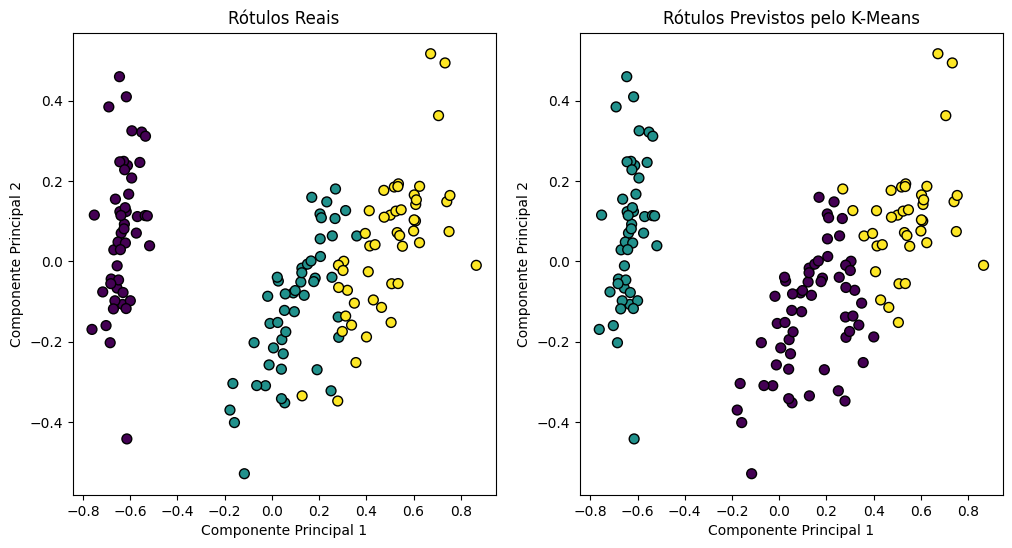

In [134]:
plt.figure(figsize=(12, 6))

# Plot com os rótulos reais
plt.subplot(1, 2, 1)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=[np.where(unique_labels == y)[0][0] for y in iris_target],
            cmap='viridis', edgecolor='k', s=50)
plt.title("Rótulos Reais")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

# Plot com os rótulos previstos pelo K-Means
plt.subplot(1, 2, 2)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.title("Rótulos Previstos pelo K-Means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")

#### **Marcar as instâncias incorretamente classificadas**

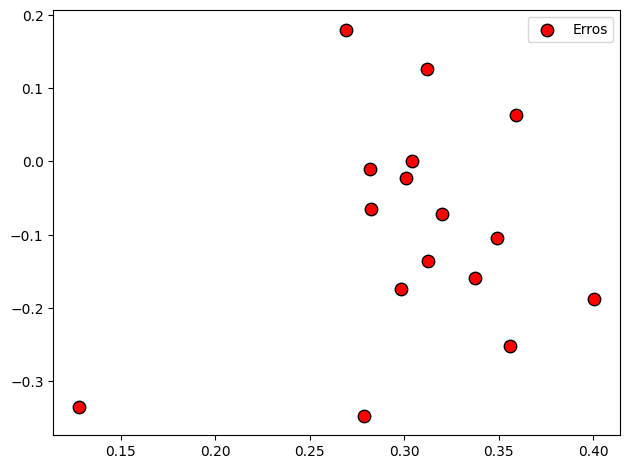

In [135]:
incorrect = (labels != [np.where(unique_labels == y)[0][0] for y in iris_target])
plt.scatter(X_2d[incorrect, 0], X_2d[incorrect, 1], color='red', edgecolor='k', s=80, label='Erros')
plt.legend()
plt.tight_layout()
plt.show()

### **8. Relatório sobre as etapas de pré-processamento e resultados obtidos**

**1. Pré-processamento dos Dados**

- **Base de dados utilizada**: Iris (disponível no sklearn.datasets)

- **Atributos utilizados**: Quatro atributos numéricos referentes às medidas de sépalas e pétalas.

- **Normalização**: Foi aplicada a técnica MinMaxScaler para escalonar os dados no intervalo [0, 1], uma etapa necessária para algoritmos baseados em distância como KMeans e DBSCAN.

- **Detecção e remoção de outliers**: Utilizou-se o método baseado no escore Z (z-score). Instâncias com valores absolutos superiores a 3 foram identificadas como outliers e removidas da base de dados.

**2. Agrupamento com KMeans**

- **Número ideal de clusters**: Avaliado por meio do método do cotovelo (Elbow Method), que indicou o valor ótimo de k = 4. Contudo, como a base contém três classes conhecidas, foi utilizada também a configuração k = 3.

- **Análise da qualidade do agrupamento**: Foi aplicada a métrica Silhouette Score, que apresentou os seguintes resultados:

```bash
k = 2: 0.623
k = 3: 0.480
k = 4: 0.436
```

- A escolha de k = 3 reflete melhor a estrutura real da base, considerando que existem três espécies de flores na base Iris (Setosa, Versicolor, Virginica).

- **Caracterização dos clusters**: O algoritmo foi capaz de identificar de forma clara a classe Setosa. Já as classes Versicolor e Virginica apresentaram maior sobreposição nos agrupamentos.

**3. Conclusão**

O algoritmo KMeans apresentou bom desempenho na base Iris, especialmente após a remoção de outliers e a normalização dos atributos. A aplicação de métricas como Silhouette Score, Elbow Method e Davies-Bouldin Index permitiu uma avaliação mais precisa da qualidade dos agrupamentos.

Os algoritmos alternativos DBSCAN e SOM mostraram resultados compatíveis, com o DBSCAN identificando ruídos e o SOM organizando os dados de forma topológica.

A comparação com as classes reais demonstrou que o agrupamento é capaz de refletir a estrutura da base, com destaque para a separação da classe Setosa. Pequenas confusões entre Virginica e Versicolor reforçam a complexidade da tarefa de agrupamento não supervisionado.

---